#K-means números aleatorios
---
@Autor: Santiago Eduardo Muñoz Castillo


##Importar librerias y bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

##Crear arrays con números aleatorios

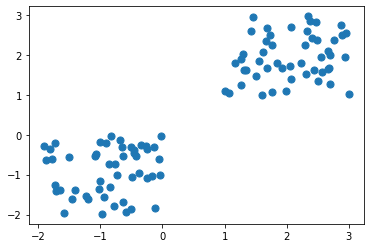

In [ ]:
#Array de 100 x 2 
X = -2 * np.random.rand(100,2)
#Cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 +(2 * np.random.rand(50,2))
#Generamos dos grupos (columna1 y columan2)
plt.scatter(X[ : ,0], X[ :, 1], s=50)
plt.show()

##Creamos la instancia del algoritmo

In [ ]:
#Como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##Buscamos los centroides

In [ ]:
Centros = Kmean.cluster_centers_

## Dibujamos los centroides para cada cluster

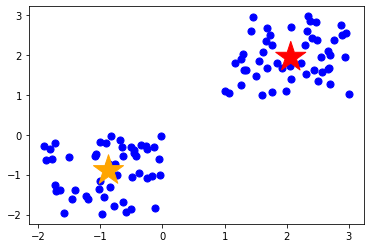

In [ ]:
colores=['orange','red']
plt.scatter(X[:,0],X[:,1], s=50, c='b')
plt.scatter(Centros[:,0], Centros[:,1], marker='*', c=colores, s=1000)

##Probando el algoritmo

In [ ]:
#Forma como se crearon los clusters (0 y 1)
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Probando los datos manuales

In [ ]:
data_test=np.array([-3.0,-3.0]).reshape(1,-1)
Kmean.predict(data_test)

array([0], dtype=int32)

#K-means prestamos bancarios

##Importando librerias

In [ ]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##Importando dataset

---
Fuente: [Github](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/9b512dc6aaa4781d4a775842a6c0d32b9fbf4fbd/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv
)

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


## Conociendo los datos

### Descripción

In [ ]:
df_bank.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


### Buscando datos nulos

In [ ]:
df_bank.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

Tomaremos sólo dos variables de los datos - "LoanAmount"/monto del prestamo y "ApplicantIncome"/ingresos del cliente

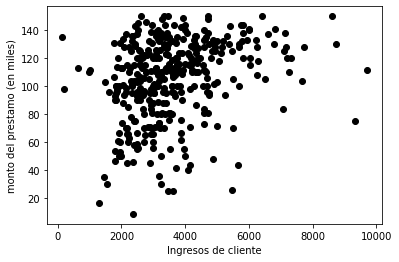

In [ ]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
plt.scatter(X["ApplicantIncome"], X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

##Buscando los centroides

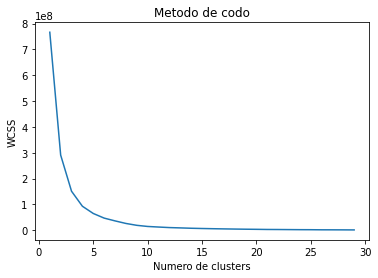

In [ ]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[ 110.42857143 4384.76190476]
 [  95.94736842 2181.77192982]
 [ 119.66666667 7712.13333333]
 [ 104.19117647 3280.13970588]
 [ 119.40625    5784.3125    ]]
[0 3 1 4 1 3 1 1 1 0 3 3 0 1 2 1 3 3 0 1 3 3 0 3 1 3 3 3 1 1 0 0 3 4 4 1 0
 1 3 0 0 1 1 3 3 1 3 0 3 2 0 1 3 0 3 1 3 0 0 1 3 1 3 3 0 3 1 1 0 1 0 3 2 1
 4 3 0 1 0 1 3 3 1 1 3 0 0 3 0 1 1 1 0 4 1 3 3 1 3 2 0 1 1 1 3 0 3 1 3 1 1
 0 3 1 1 0 0 0 1 3 1 3 0 0 3 0 1 3 3 4 3 0 1 3 0 0 1 0 3 4 0 1 3 3 3 3 3 3
 4 1 4 3 4 2 4 3 1 3 1 4 4 0 1 2 4 0 3 3 3 3 1 0 3 3 0 0 1 1 3 1 3 0 3 0 3
 4 0 0 1 1 3 0 1 0 3 1 3 3 1 4 3 3 1 3 1 0 3 0 0 1 0 3 3 4 0 1 3 1 3 1 4 1
 3 0 3 0 0 3 2 4 1 4 3 3 0 2 0 3 4 3 2 0 3 1 1 4 1 1 3 3 3 3 0 1 3 3 1 1 0
 1 1 0 1 3 1 3 4 1 1 2 1 0 4 3 1 2 4 1 3 1 2 0 3 0 3 3 1 1 0 1 2 0 0 0 2 4
 0 4 3 1 0 1 0 1 3 3 1 1 3 1 1 3 3 3 1 0 3 1 3 0 3 3 3 3 1 3 1 3 3 1 1 4 3
 1 2 0 3 1 3 3 0 1 3 1 3 3 1 0 3 3 4 1 3 4 0 3 3 1 3 4 3 3 3 1 1 3 1 3 1 1
 0 1 3 0 0 3 4 3 3 0 0]


##Graficando datos y centroides

In [10]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
  asignar.append(colores[row])

[110.42857143  95.94736842 119.66666667 104.19117647 119.40625   ]


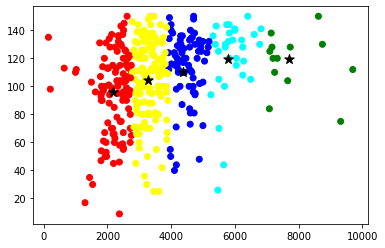

In [15]:
print(centroids[:,0])
# mostrando grupos según Openess y Extraversion
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values

plt.scatter(f1, f2, c=asignar)
plt.scatter(centroids[:,1], centroids[:,0],marker='*', c='black', s=100)
plt.show()

##Resultados en tablas

In [18]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,Graduate,0
1,Graduate,3
2,Not Graduate,1
3,Graduate,4
4,Not Graduate,1


In [19]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
3,Graduate,4
33,Graduate,4
34,Graduate,4
74,Graduate,4
93,Graduate,4
129,Not Graduate,4
139,Graduate,4
148,Graduate,4
150,Graduate,4
152,Graduate,4


#k-means psicología (los grandes cinco)


---
*   “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*   “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*   “ag” = Agreeableness – grado de empatía con los demás, temperamento
*   “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.


##Importando librerías

In [39]:
import numpy as np
import pandas as pd
import random
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [21]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


##conociendo los datos

---Categorias 
*   1-Actor/actriz
*   2-Cantante
*   3-Modelo
*   4-Tv, series
*   5-Radio
*   6-Tecnología
*   7-Deportes
*   8-Politica
*   9-Escritor

In [22]:
df_psico.describe()
#df_psico.isnull().sum()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


###graficando

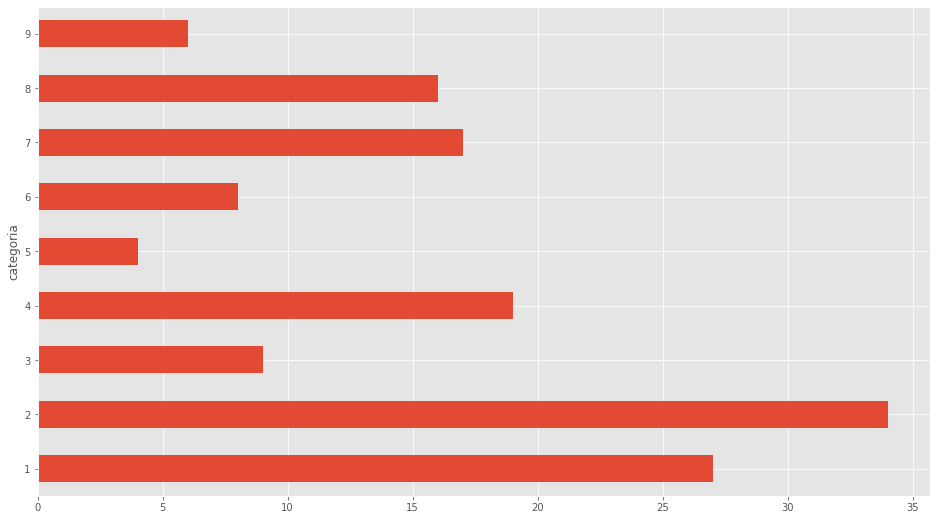

In [23]:
df_psico.groupby('categoria').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


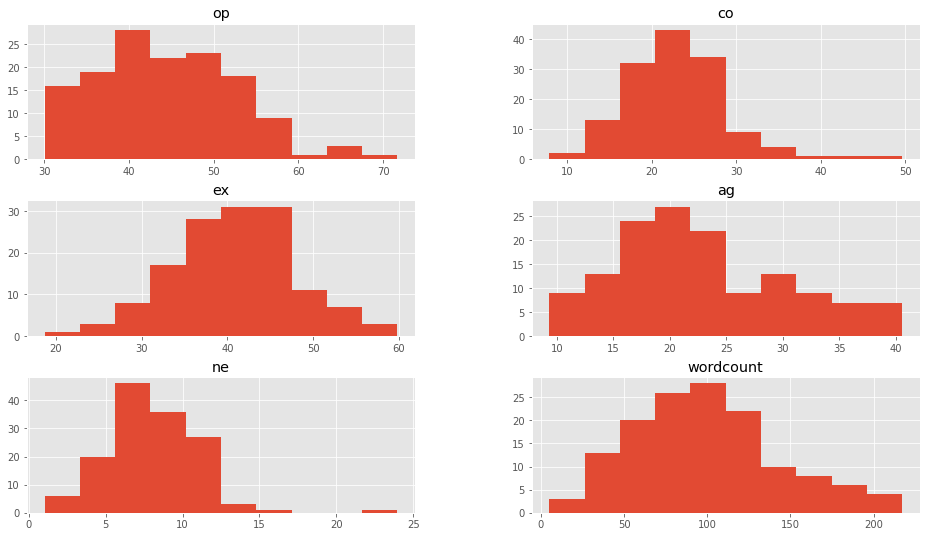

In [24]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


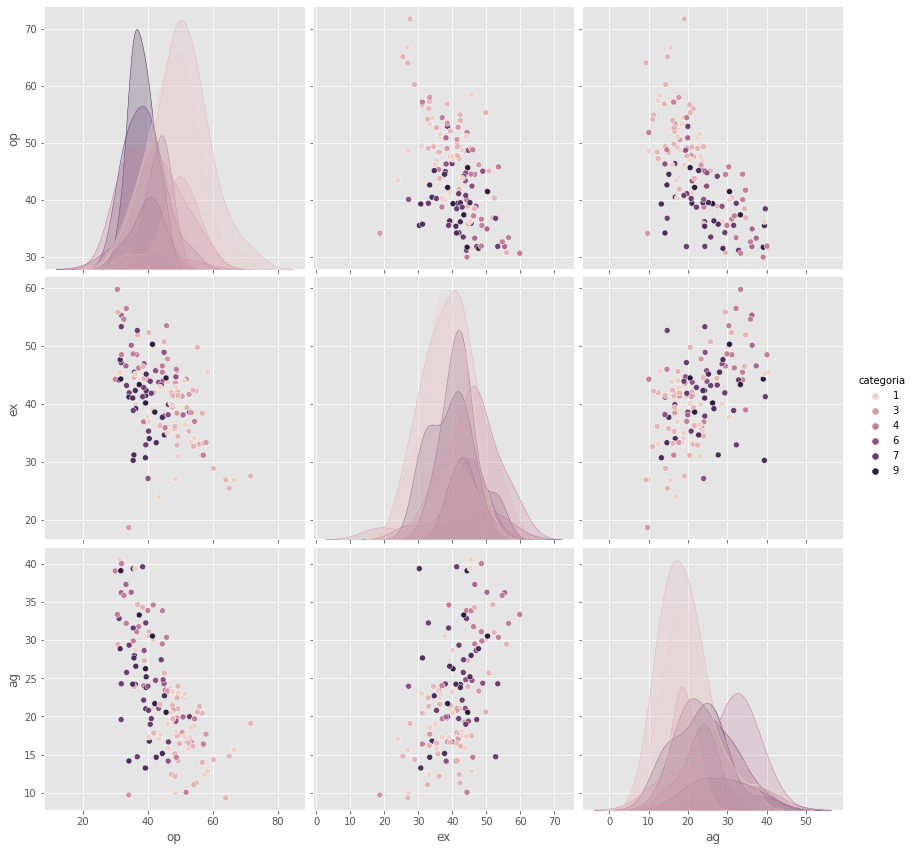

In [25]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [26]:
#X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

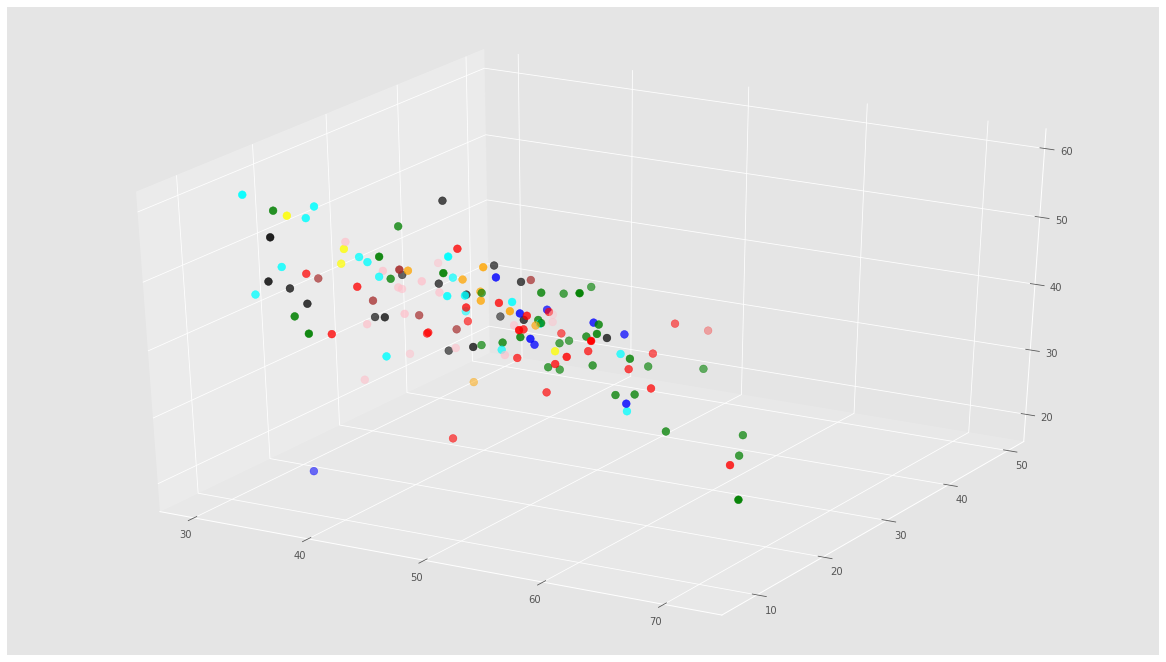

In [27]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

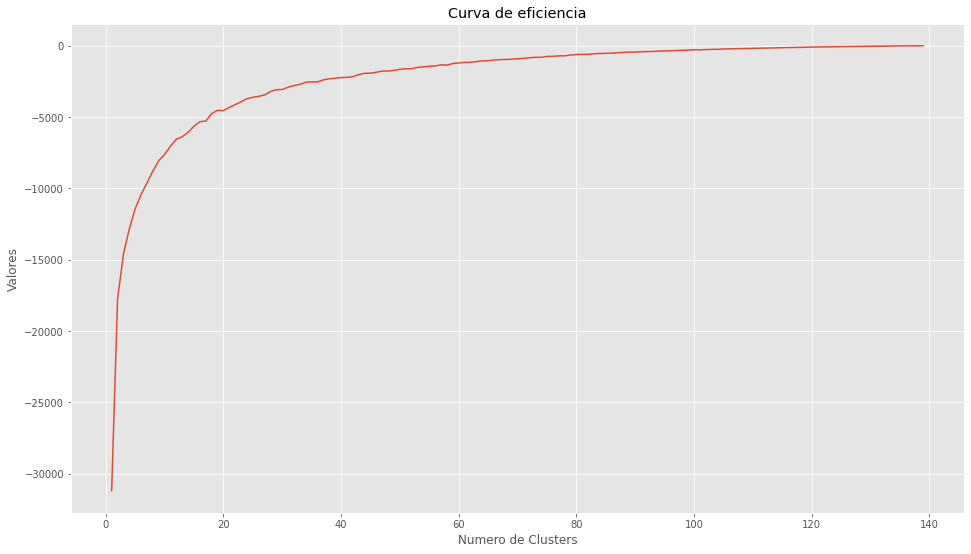

In [28]:
Nc = range(1, 140)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

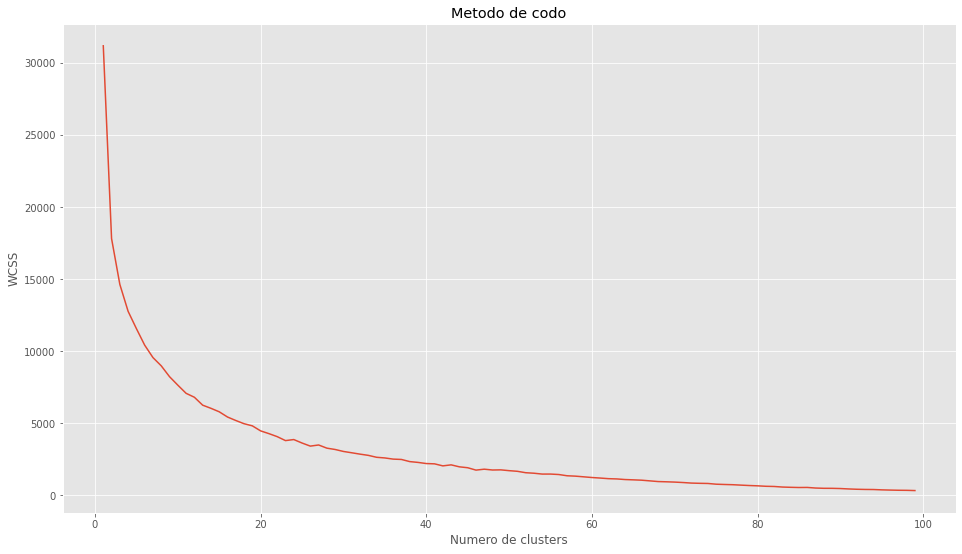

In [29]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [30]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[38.74259825 29.27193775 32.666497   24.1298765  10.123835  ]
 [55.361512   24.4445366  34.7610337  17.5607242   7.0228048 ]
 [43.57815775 18.51658113 49.7431995  29.453945    5.14980325]
 [48.95626808 20.70472075 44.30674808 18.27817767  7.350267  ]
 [38.36123767 28.76301467 37.42549833 16.06906967 12.06619367]
 [38.16633723 23.79219808 43.64595692 25.49404669  8.56773138]
 [34.59222164 19.24182179 46.5765255  36.177275    8.480713  ]
 [65.5299666  21.4103088  27.1434742  14.6252708   3.8091508 ]
 [48.587099   49.637863   26.988702    9.948168    2.979542  ]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [47.21177763 23.088407   36.57302031 22.37412519  9.02734469]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]
 [38.04914567 20.48328944 38.41687556 32.34631856  9.52408   ]
 [53.68382211 21.51002733 41.62905611 14.36628644  6.00464689]
 [48.709282   19.606051   44.728513   19.387538   23.978462  ]
 [54.1773595  33.608368   33.12453375 16.442867    7.94

##visualizar grupos y centroides

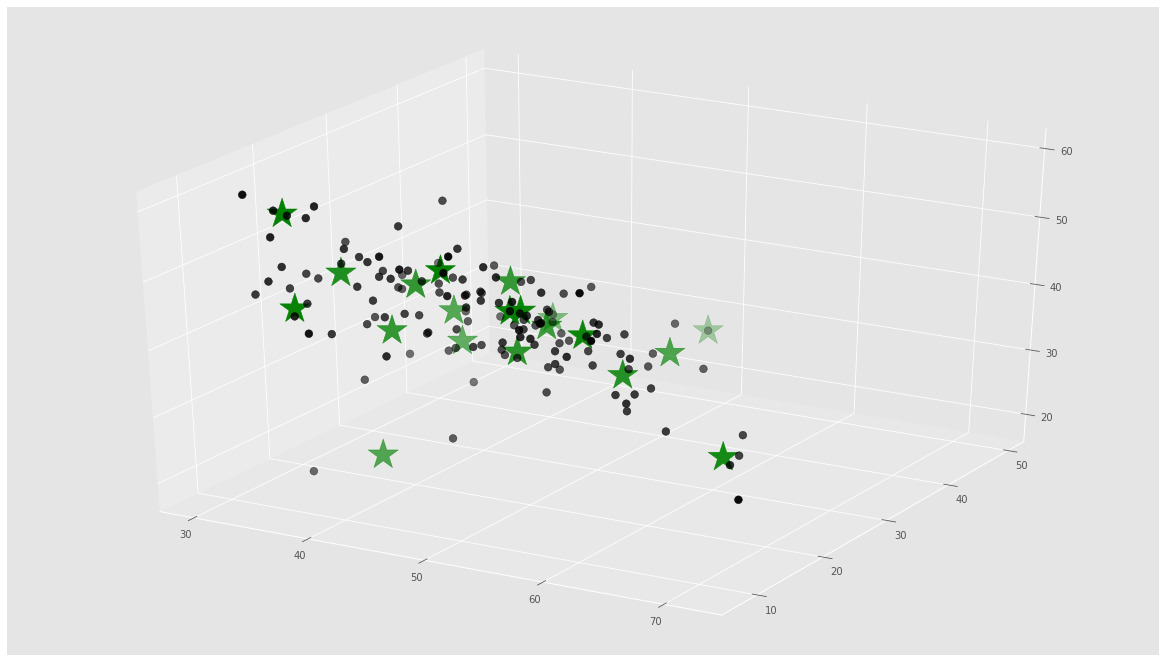

In [36]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','black','pink','brown','purple','silver','olive','fuchsia','chestnut','maroon','teal','turquoise','violet','scarlet','white']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='black',s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='green', s=1000)

In [37]:
labels = kmeans.predict(X)
labels


array([ 5, 10, 12,  2,  6, 19, 19,  9, 18, 12, 13, 10,  1, 10,  5,  3, 12,
       16,  3,  6,  6,  3, 11,  6, 18, 10,  5, 12,  2, 10,  4, 13,  3,  1,
        9,  6,  2,  9, 19, 10,  2,  2,  5, 12, 15, 15, 14,  1,  6,  9,  3,
        5,  5,  7, 12, 13, 10, 16,  0,  1,  4,  0, 13,  1,  5,  5,  7,  8,
        1,  2,  5, 17, 18, 13, 10,  1, 12,  6,  9,  6,  6, 16,  1,  3, 10,
       16, 13,  3, 18, 16, 18,  0, 10, 16,  3,  5,  6, 13,  6, 18, 15, 10,
       10,  9,  7,  1, 19,  5, 16, 10, 16, 12,  5,  2, 16,  3, 17,  7,  2,
        5, 10,  6,  3, 18, 15, 11,  0, 13,  3, 10,  3, 13,  4, 16,  1, 12,
        6,  7, 10,  6], dtype=int32)

##visualización en 2D

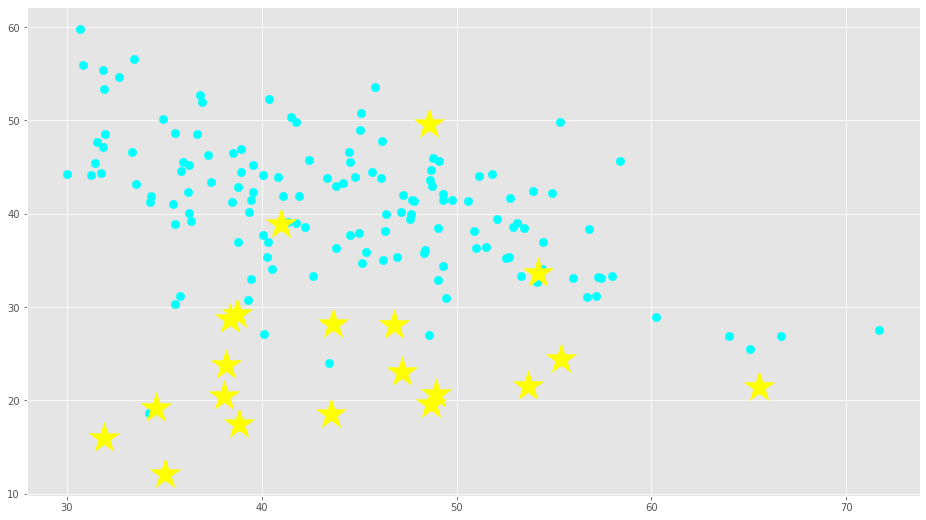

In [43]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c='cyan', s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c='yellow', s=1000)
plt.show()

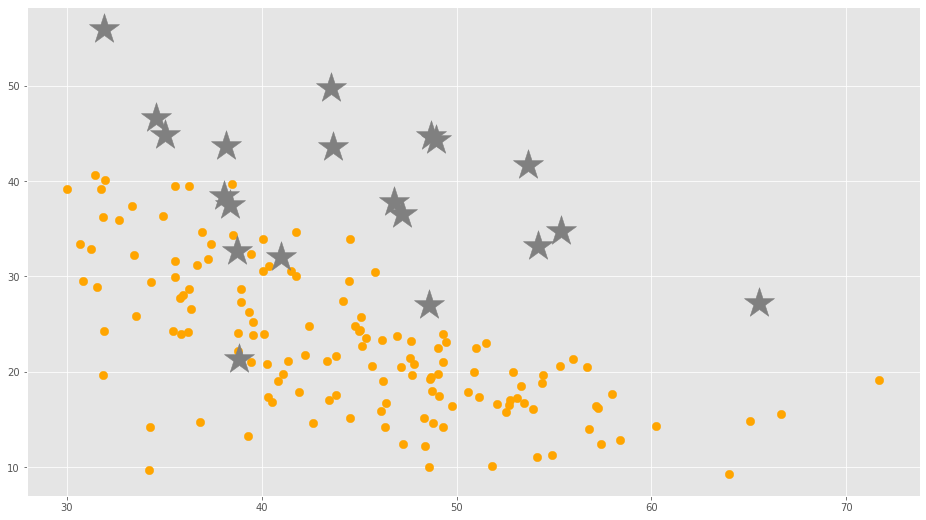

In [46]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c='orange', s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c='grey', s=1000)
plt.show()

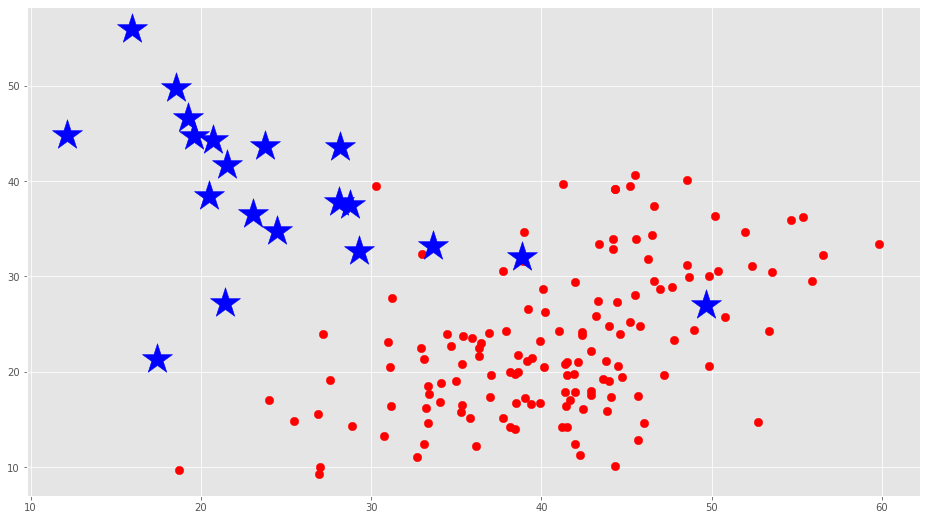

In [48]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c='red', s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c='blue', s=1000)
plt.show()

##Ver resultados en tablas

In [49]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,4
1,red,10
2,green,8
3,yellow,12
4,cyan,3
5,orange,13
6,black,14
7,pink,5
8,brown,1
9,purple,6


###diversidad por categorias laborales

In [50]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,1.0
5,5,NaN
6,6,1.0
7,7,1.0
8,8,1.0
9,9,NaN


##usuarios con rasgos de personalidad más similares

In [51]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,5
1,aguerosergiokun,10
2,albertochicote,12
3,AlejandroSanz,2
4,alfredocasero1,6


In [52]:
df_cluster[df_cluster.cluster == 3]

,data_index,cluster
15,BarRefaeli,3
18,britneyspears,3
21,carmenelectra,3
32,Courtney,3
50,Fergie,3
83,justdemi,3
87,KateUpton,3
94,LeoDiCaprio,3
115,RealHughJackman,3
122,shakira,3


###usuarios más relevantes en cada clouster

In [53]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

hughlaurie
JLo
porliniers
BarRefaeli
tomhanks
FernandezAnibal
DaniMateoAgain
JerrySeinfeld
jessicaalba
davidbisbal
cesarmillan
Carrie_Br4dshaw
EdwardNorton
taylorswift13
epunset
MeganFox516
paulocoelho
jiminhofe
martinvars
pabloalboran


#DATOS DE MERCADEO DE VALORES (Acciones de XXXXX)

---
Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de XXX en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


##Importando librerías generales

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Descargando data usando Web-scrawping

###Consumiendo data (web scraping) 

In [21]:
#UrlWeb="https://es.wikipedia.org/wiki/Departamentos_de_Colombia"
#ClassName="wikitable sortable jquery-tablesorter"
UrlWeb= "https://es.finance.yahoo.com/quote/UEN.F/history?p=UEN.F"
ClassName="W(100%) M(0)"                                                               #clase de la tabla 

####Op1-con BeautifulSoup

In [22]:
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

In [23]:
response=requests.get(UrlWeb)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
dfs=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
#df.to_csv('dataAcciones.csv', index_label='row')
df.head()

404


ValueError: ignored

####Opt2-con Selenium (cuando bloquean las páginas para robots)

---
A diferencia de Scrapy y de BeautifulSoup, Selenium no trabaja con el texto fuente en HTML de la web en cuestión, sino que carga la página en un navegador sin interfaz de usuario que crea un DOM ( Document Object Model-modelo de objetos de documento). En este navegador se puede simular clic's 
*   URL → Solicitud HTTP → HTML → Selenium → DOM


In [ ]:
!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

In [19]:
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

MaxRetryError: ignored

In [20]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe

ValueError: ignored

In [ ]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(10)                                                         #Las ultimas filas

,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
91,04 nov 2021,80.18,83.42,78.25,78.81,78.81,701119
92,03 nov 2021,83.07,83.08,79.69,80.86,80.86,546577
93,02 nov 2021,83.87,84.41,82.92,83.91,83.91,429608
94,01 nov 2021,83.36,84.88,82.74,84.05,84.05,412309
95,29 oct 2021,83.09,83.74,81.41,83.57,83.57,507309
96,28 oct 2021,82.25,83.21,80.58,82.81,82.81,491585
97,27 oct 2021,84.39,84.51,82.01,82.66,82.66,529952
98,26 oct 2021,83.72,84.88,82.97,84.65,84.65,467716
99,25 oct 2021,83.98,85.41,83.39,83.76,83.76,568725
100,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...


In [ ]:
#tenemosque borrar la ultima fila
df = df[:-1]

##Conociendo los datos descargados

In [ ]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              100 non-null    object
 1   Abrir              100 non-null    object
 2   Alto               100 non-null    object
 3   Bajo               100 non-null    object
 4   Cierre*            100 non-null    object
 5   Cierre ajustado**  100 non-null    object
 6   Volumen            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
____________describe____________
               Fecha  Abrir   Alto   Bajo Cierre* Cierre ajustado** Volumen
count           100    100    100    100     100               100     100
unique          100     98     97     99      99                99      99
top     16 mar 2022  78.34  78.65  89.03   76.99             76.99  328848
freq              1      3      2      2       2                 2       2
____________nulos?__

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo:
*   conversión de datos de object a int/float o dateime
*   eliminar campos que no usaremos
*   En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


####Convertimos los campos object a datetime o numeric (int/float)

In [ ]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [ ]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

In [ ]:
#salvamos el dataFrame 
df.to_csv('Precio_petroleo_2021_2022.csv', index_label='row')

####Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [ ]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


####normaliza todos los datos entre [0, 1].

---
En este caso utilizaremos la función MinMaxScaler()


In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [ ]:
df_escalado.head()
#df_escalado.isnull().sum()

,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,0.501440,0.503571,0.579063,0.506967,0.506967,0.271775
1,0.620871,0.556896,0.569180,0.531051,0.531051,0.407452
2,0.741826,0.670211,0.683199,0.644074,0.644074,0.335037
3,0.683720,0.679257,0.769583,0.752795,0.752795,0.365271
4,0.758597,0.752103,0.788799,0.695854,0.695854,0.453079


###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





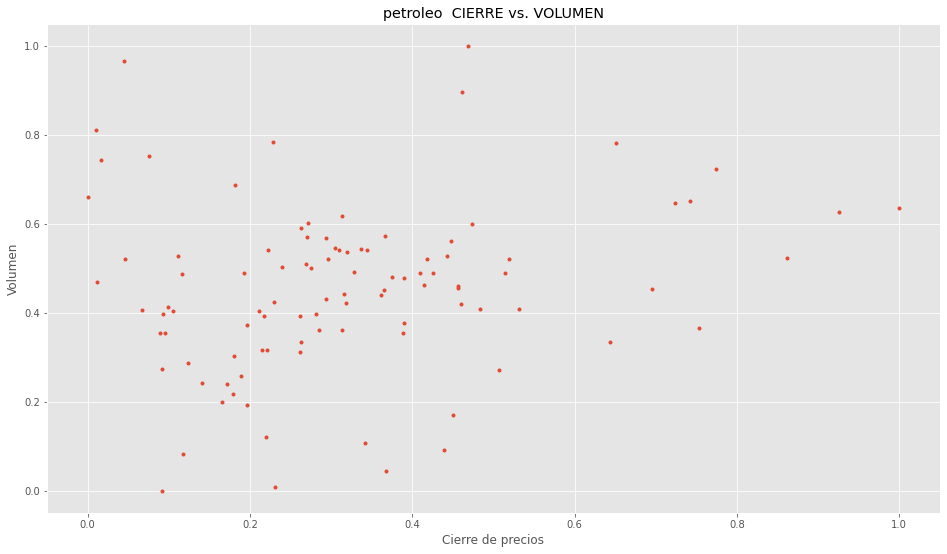

In [ ]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('petroleo  CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

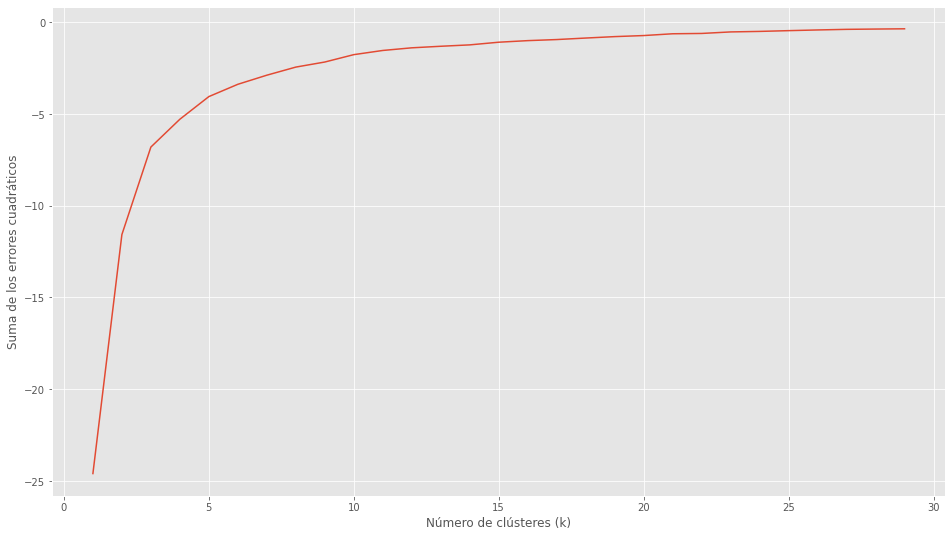

In [ ]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [ ]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.18632809 0.16287306 0.24194729 0.19479932 0.19479932 0.20457672]
 [0.43353976 0.41656527 0.4968345  0.44681461 0.44681461 0.4877614 ]
 [0.80603083 0.81003015 0.81950545 0.79129155 0.79129155 0.55111206]
 [0.0762776  0.06893086 0.09735237 0.06530191 0.06530191 0.55085027]
 [0.2661641  0.24132677 0.32218765 0.27499857 0.27499857 0.50119466]]


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [ ]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [ ]:
df.head(10)

,Date,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen,label
0,2022-03-16,2022-03-16,95.23,99.22,94.07,95.04,95.04,293947,1
1,2022-03-15,2022-03-15,102.28,102.58,93.53,96.44,96.44,401690,1
2,2022-03-14,2022-03-14,109.42,109.72,99.76,103.01,103.01,344184,3
3,2022-03-11,2022-03-11,105.99,110.29,104.48,109.33,109.33,368194,3
4,2022-03-10,2022-03-10,110.41,114.88,105.53,106.02,106.02,437924,3
5,2022-03-09,2022-03-09,124.66,126.84,103.63,108.70,108.70,594773,3
6,2022-03-08,2022-03-08,120.67,129.44,117.07,123.70,123.70,583106,3
7,2022-03-07,2022-03-07,121.33,130.50,115.54,119.40,119.40,576022,3
8,2022-03-04,2022-03-04,107.96,116.02,107.25,115.68,115.68,493875,3
9,2022-03-03,2022-03-03,111.33,116.57,106.43,107.67,107.67,592031,3


##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


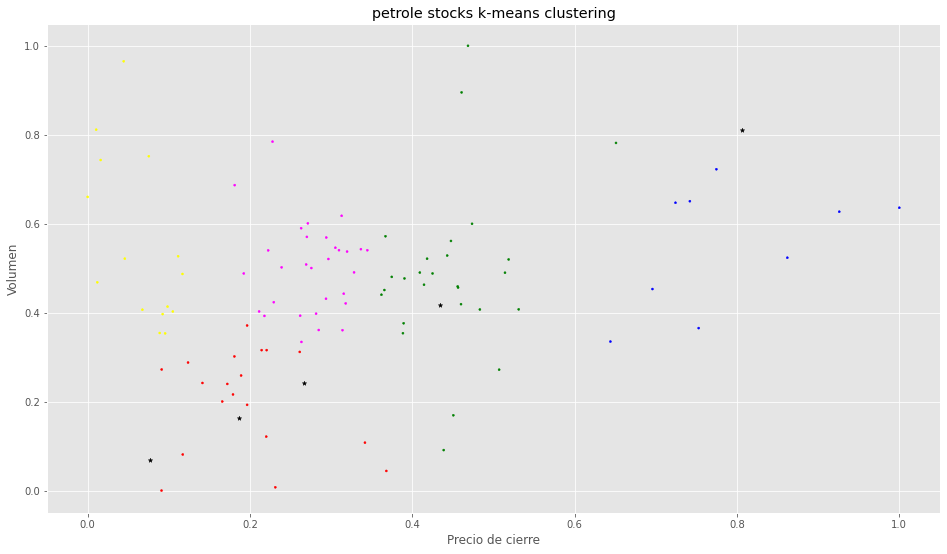

In [ ]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('petrole stocks k-means clustering')
plt.show()

**Que podemos inferir???**